# This is the demo of affinity propagation clustering algorithm
“通过数据点传递信息进行聚类”

In [15]:
# Authors: The scikit-learn developers
# Writer: wang
# SPDX-License_Identifier: BSD-3-Clause

### 导入相关的python 库

In [16]:
import numpy as np

from sklearn import metrics # sklearn 内的评估模块， 用来计算聚类结果的质量指标
from sklearn.cluster import AffinityPropagation #亲和传播聚类算法的实现类
from sklearn.datasets import make_blobs #用于生成模拟数据的函数， 可以制造出机组高斯啊分布的数据点

### Generate sample data
* centers: 定义三个簇的中心点位置
* make_blobs:
    * cluster_std = 0.5 控制簇的紧密程度， 值越小簇越紧
    * random_std=0: 保证实验可复现
* X : 返回二维数组， 形状为（300，2） 即300个二维点
* labels_true : 每个点的真实类别标签（0、1、2）

In [17]:
centers = [[1,1],[-1,-1],[1,-1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)

### Compute Affinity Propagation
* AffinityPropagation()：初始化模型
    * preference = -50 : 控制样本作为簇中心的清乡，越小的值-> 越少簇数
    * random_state=0 :保证随机过程可重复
* cluster_centers_indices_ :保存所有聚类中心（即exemplar) 的样本索引
* labels_ : 每个样本所属的聚类编号

In [18]:
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: % 0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index:  0.912
Silhouette Coefficient: 0.753


### Plot result
* range(n_clusters_) 表示一个整数序列： 0,1,2,..., n_clusters_-1
* zip(range(n_clusters_) 中zip() 会将两个可迭代对象“打包”成对， 形成一个元组序列。
    * range(3) = [0, 1, 2]
      colors = [{'color': '#440154'}, {'color': '#21918c'}, {'color': '#fde725'}]
        * 打包为：[(0, {'color': '#440154'}),
            (1, {'color': '#21918c'}),
            (2, {'color': '#fde725'})]
* cluster_members = labels == k 选出属于第k个簇的所有样本
* cluster_center = X[..] 找到该簇的中心坐标
* plt.plot 将每个样本与其簇中心连接成线， 帮助直观看到每个样本“归属”的中心

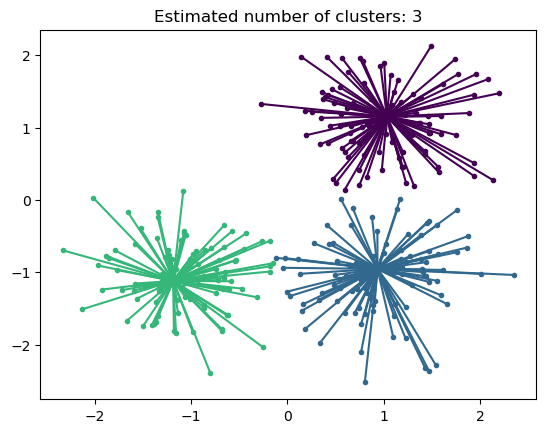

In [19]:
import matplotlib.pyplot as plt

plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1,4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members,0],X[class_members,1],color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0],x[0]],[cluster_center[1],x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### Affinity Propagation compared with K-Means
* 不需要事先指定簇数；
* 基于"信息传递机制" 工作，每个样本都是潜在的簇中心；
* 通过“责任制（responsibility）和“可用度（availability)”两种消息反复传递；
* 最终收敛时，有些样本成为“exemplar", 其余样本归属这些exemplar;
* 可看作 样本之间相互投票，决定谁当代表”，直到形成稳定的簇结构